In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
df = pd.read_csv(r'D:\NASSCOM data\HACK-NASSCOM\complete_merged.csv',index_col=0)
df.head()

,district,date,rain,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max
0,Adilabad,2018-01-01,0.0,11.200000,30.436842,25.721053,75.484211,0.236842,9.121053
1,Adilabad,2018-01-02,0.0,12.426316,33.621053,13.842105,57.284211,0.000000,9.094737
2,Adilabad,2018-01-03,0.0,20.131579,37.047368,15.736842,45.573684,0.000000,10.636842
3,Adilabad,2018-01-04,0.0,26.147368,40.431579,9.000000,72.452632,0.078947,15.726316
4,Adilabad,2018-01-05,0.0,29.168421,43.084211,11.384211,39.200000,0.252632,17.742105


In [4]:
import datetime as dt
df['date'] = pd.to_datetime(df['date'])
df1 = df.loc[df['district']=='Adilabad']
df1 = df1[df1['date'].dt.year.isin([2018])]
df1.shape

(365, 9)

In [5]:
def plot_data(df,year=None,month=None,day=None):
    if(year):
        df = df[df['date'].dt.year == year]
    if(month):
        df = df[df['date'].dt.month == month]
    if(day):        
        df = df[df['date'].dt.day == day]
    plt.figure()
    plt.title('Maximum Temperature Over Time')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.grid()
    plt.plot(df['date'],df['temp_max'])

C:\Users\Vanshaj\AppData\Local\Temp/ipykernel_23240/1823116504.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date'] = df1['date'].dt.strftime('%m-%d')
C:\Users\Vanshaj\AppData\Local\Temp/ipykernel_23240/1823116504.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date'] = df1['date'].dt.strftime('%m-%d')
C:\Users\Vanshaj\AppData\Local\Temp/ipykernel_23240/1823116504.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

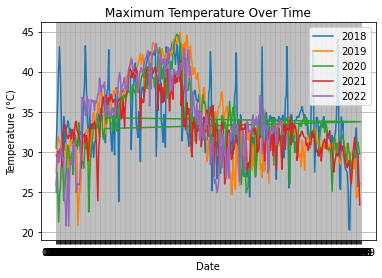

In [6]:
# %matplotlib qt
years = [2018,2019,2020,2021,2022]
# df['date'] = pd.to_datetime(df['date'])
df_district = df.loc[df['district']=='Adilabad'].copy()
plt.figure()
plt.title('Maximum Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid()
for i in years:
    df1 = df_district[df_district['date'].dt.year == i]
    # df1 = df1[df1['date'].dt.month == 3]
    df1['date'] = df1['date'].dt.strftime('%m-%d')
    plt.plot(df1['date'],df1['temp_max'],label = str(i))
plt.legend()

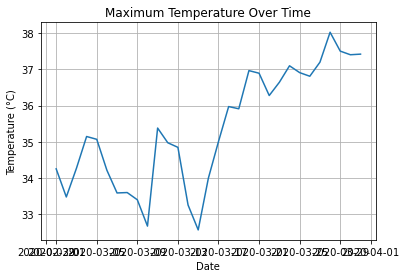

In [7]:
plot_data(df_district,year= 2020,month = 3)

In [8]:
df_new = df_district.drop(columns=['date','district'])
X = df_new.drop(columns=['temp_max'])
y = df_new['temp_max']

In [12]:
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
le = LinearRegression()

le.fit(X_train, y_train)
print(le.score(X_test, y_test))

0.9285846833520488


In [13]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

y_pred = le.predict(X_test)
# plt.plot(y_test, y_pred)
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)


MAE: 0.8988961436163511
MSE: 1.476045001017451
RMSE: 1.2149259240865062


In [14]:
from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████| 41/41 [00:05<00:00,  7.54it/s]


In [18]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.95,0.95,1.06,0.34
RandomForestRegressor,0.94,0.94,1.10,0.50
LGBMRegressor,0.94,0.94,1.11,0.08
BaggingRegressor,0.94,0.94,1.12,0.11
GradientBoostingRegressor,0.94,0.94,1.13,0.18
HistGradientBoostingRegressor,0.94,0.94,1.14,0.66
XGBRegressor,0.93,0.93,1.17,1.40
SGDRegressor,0.93,0.93,1.21,0.01
LinearSVR,0.93,0.93,1.21,0.02
